# Objectives - Using Python for MRI with Nilearn
- The goal of this section is to get familiar with loading, manipulating, visualizing brain MR images in Python.

  

## Explore [Nilearn](https://nilearn.github.io/stable/index.html) package

`A Python module for fast and easy statistical learning on NeuroImaging data. It leverages the scikit-learn Python toolbox for multivariate statistics with applications such as predictive modeling, classification, decoding, or connectivity analysis.`

### NIfTI data

#### For volumetric data, NiBabel works with data stored in the Nifti structure.

The NifTi data is the standard way of sharing data in neuroimaging research. Three main components are:
- [header](https://nipy.org/nibabel/nibabel_images.html#the-image-header): contains metadata about the image such as image dimensions, data type, slice duration, etc. 
  `img.header`
- data: raw data of the image `img.get_fdata()`
- [affine](https://nipy.org/nibabel/coordinate_systems.html): a transformation matrix that maps the image data in array to real-world coordinate positions of the brain `img.affine`

### Niimg-like objects

Niimg: A Niimg-like object can be one of the following:

- A string with a file path to a Nifti image
- A SpatialImage from nibabel, i.e., an object exposing the get_data() method and affine attribute, typically a Nifti1Image from nibabel.


### Load and inspect the images in `nilearn`

In [1]:
from nilearn import image

Use `image()` function to creat a NiBabel image object from the path to a Nifti file.

In [11]:
t1_img = image.load_img('nii/dcm_anat_ses-01_T1w_20190219111436_5.nii.gz')

In [12]:
t1_img.shape

(192, 256, 256)

In [13]:
print(t1_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (192, 256, 256)
affine:
[[ 8.99742126e-01  1.05651410e-03  2.05146018e-02 -9.00501099e+01]
 [-7.48920813e-03  8.19935203e-01  2.57255703e-01 -1.43966370e+02]
 [-2.01671515e-02 -2.57352889e-01  8.19709778e-01 -7.67913361e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.         0.90000004 0.859375   0.859375   2.3        0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
c

### 1. Header

In [14]:
t1_header = t1_img.header

In [15]:
print(t1_header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.         0.90000004 0.859375   0.859375   2.3        0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=3.1;Time=112922.273;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.15146269
quatern_c       : 0.011705771
quatern_d       : -0.0024157318
qoffset

### 2. Image data

In [16]:
t1_data = t1_img.get_fdata()
t1_data

array([[[ 4.,  7.,  3., ...,  3.,  3.,  0.],
        [ 1.,  6.,  2., ...,  2.,  4.,  0.],
        [ 4.,  4.,  2., ...,  6.,  5.,  0.],
        ...,
        [ 6.,  1.,  9., ...,  3.,  6.,  0.],
        [ 2.,  3.,  6., ...,  7.,  2.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 4.,  5.,  0., ...,  3.,  1.,  0.],
        [ 2.,  1.,  8., ...,  4.,  1.,  0.],
        [ 5.,  1.,  8., ...,  3.,  4.,  0.],
        ...,
        [10., 19.,  2., ...,  0.,  2.,  0.],
        [ 5.,  3.,  3., ...,  3.,  4.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  2.,  3., ...,  2.,  1.,  0.],
        [ 2.,  4.,  9., ...,  2.,  8.,  0.],
        [ 7.,  7.,  9., ...,  4.,  4.,  0.],
        ...,
        [ 1.,  2.,  9., ...,  1.,  0.,  0.],
        [ 5.,  8.,  7., ...,  2.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 7.,  2.,  4., ...,  1.,  3.,  0.],
        [ 7.,  4.,  5., ...,  3.,  4.,  0.],
        [ 7.,  3.,  9., ...,  3.,  3.,  0.

In [17]:
type(t1_data)

numpy.ndarray

In [87]:
t1_data.ndim

3

In [88]:
t1_data.shape

(192, 256, 256)

/home/kdadi/miniconda3/envs/medsam/lib/python3.10/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


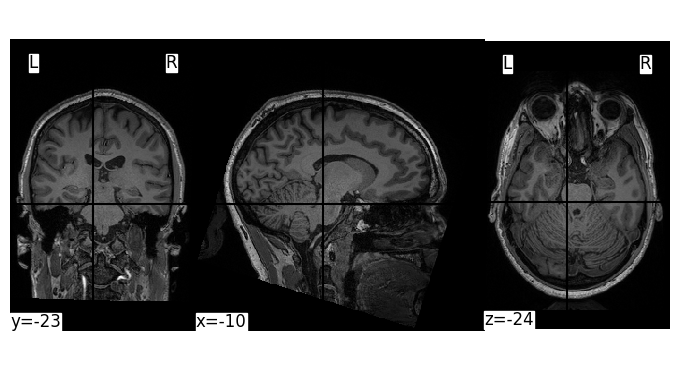

In [20]:
from nilearn import plotting
plotting.plot_img('nii/dcm_anat_ses-01_T1w_20190219111436_5.nii.gz', cmap='Greys_r')

/home/kdadi/miniconda3/envs/medsam/lib/python3.10/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


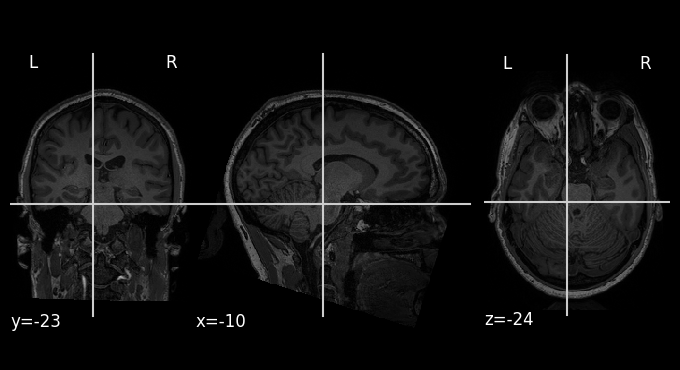

In [23]:
plotting.plot_anat('nii/dcm_anat_ses-01_T1w_20190219111436_5.nii.gz', cmap='Greys_r')

/home/kdadi/miniconda3/envs/medsam/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/kdadi/miniconda3/envs/medsam/lib/python3.10/site-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int32 to float32
  return resample_img(



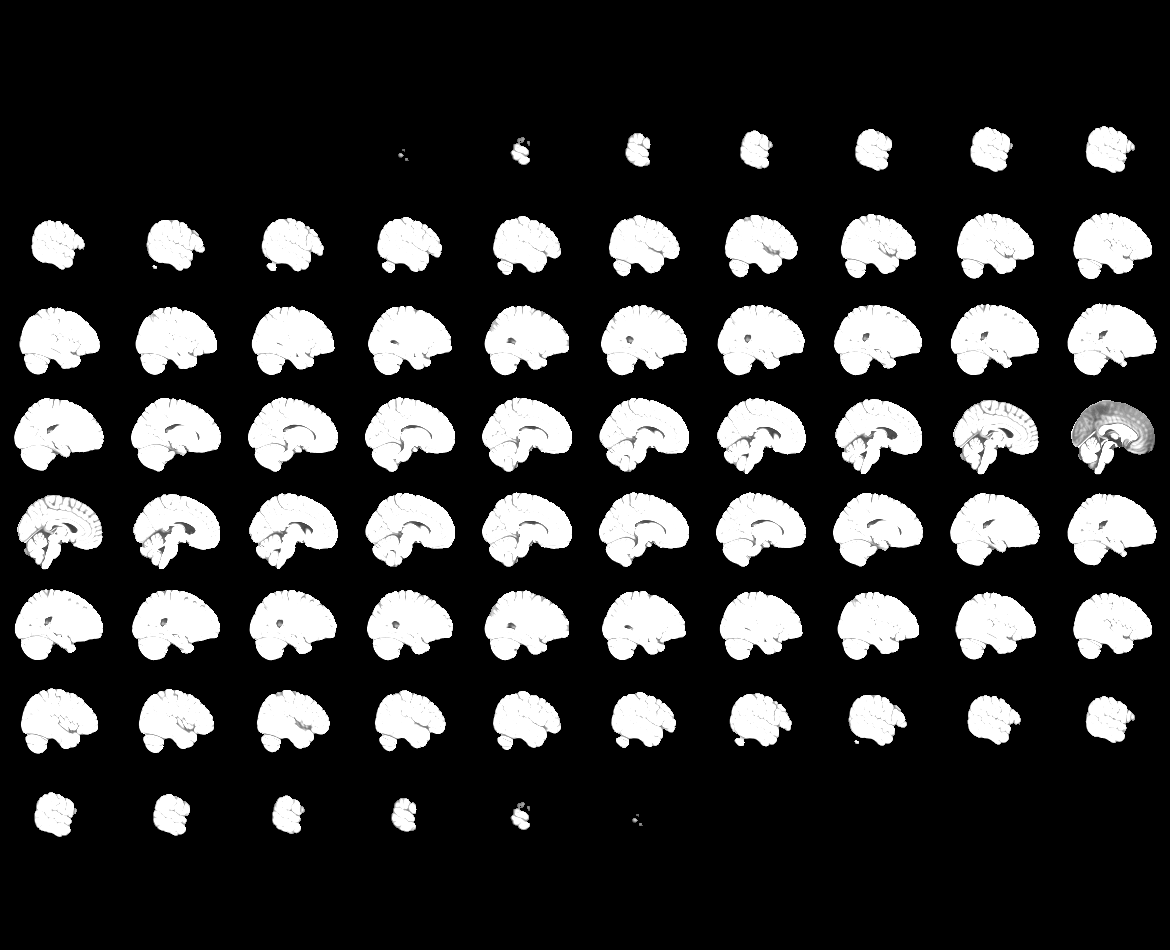
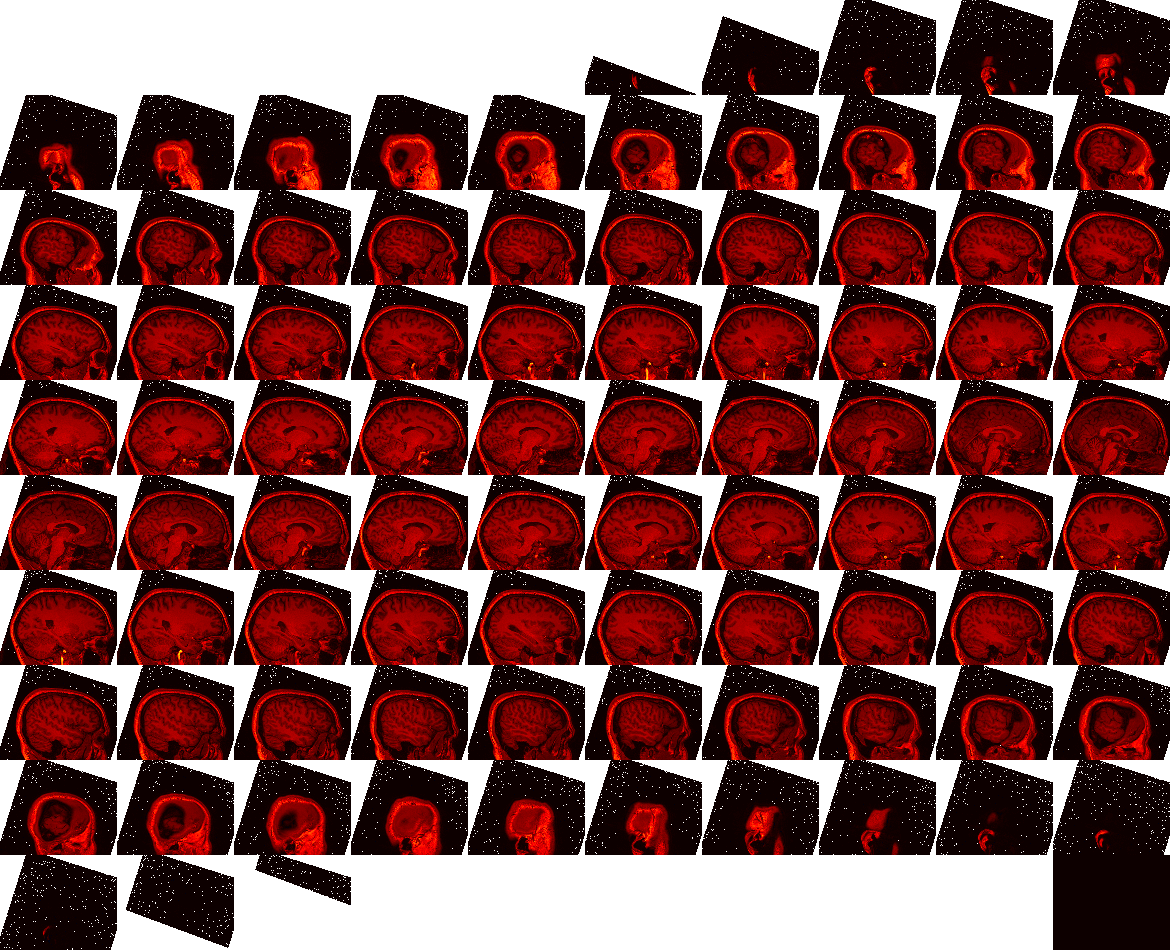

In [29]:
import matplotlib.pyplot as plt
plotting.view_img(t1_img, dim=-1)

/home/kdadi/miniconda3/envs/medsam/lib/python3.10/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


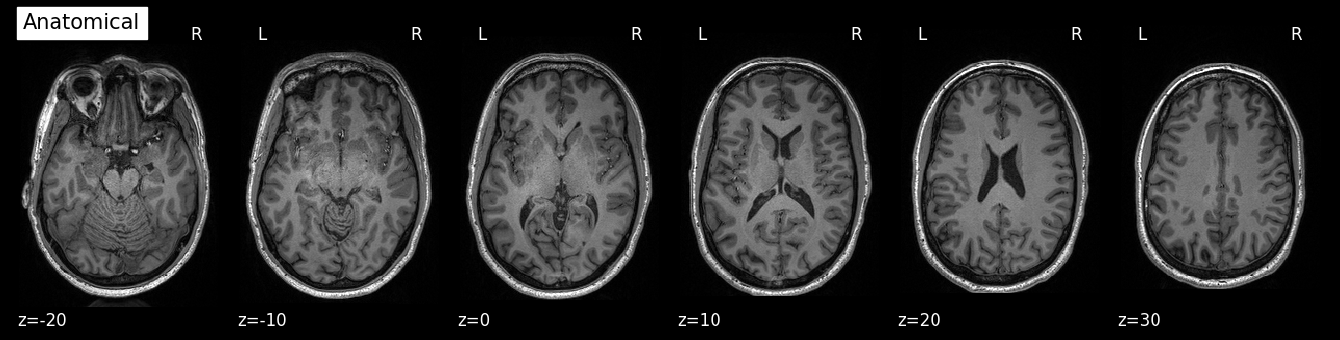

In [31]:
plotting.plot_anat(t1_img, title='Anatomical', display_mode='z', dim=-1,
                   cut_coords=[-20, -10, 0, 10, 20, 30])

## Smooth an image

In [32]:
smooth_t1_img = image.smooth_img(t1_img, fwhm=3)

smooth_t1_img

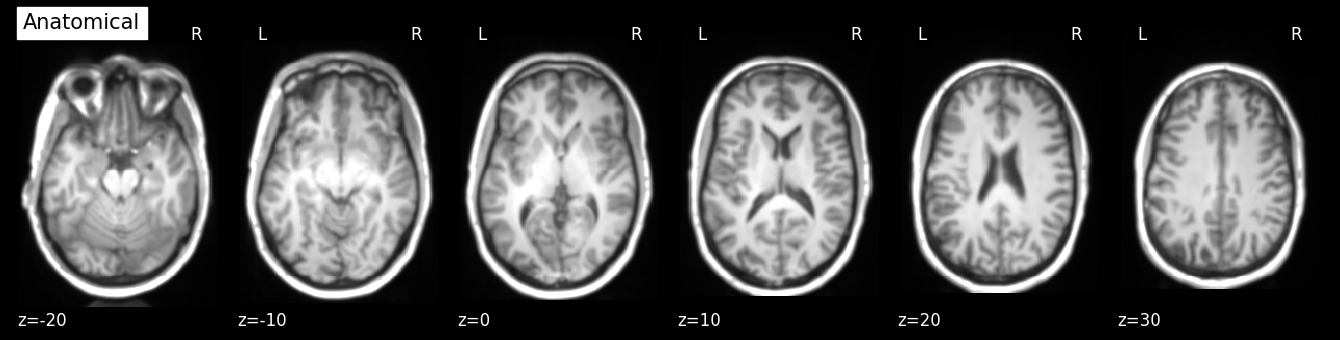

In [33]:
plotting.plot_anat(smooth_t1_img, title='Anatomical', display_mode='z', dim=-1,
                   cut_coords=[-20, -10, 0, 10, 20, 30])